<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/Demo%20Covers/CM-Demo-dex_data-Cover.png" width=1100 margin-left='auto' margin-right='auto'/>

Decentralized exchanges are playing an increasingly important role in supporting cryptoasset trading, particularly when it comes to tokens using the ERC-20 standard. Coin Metrics has been actively working on collecting data from major DeFi protocols. For our first release, we have added support for all major liquidity pools on **Uniswap v2, Uniswap v3,** and **Sushiswap v1.**

## Resources
This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client and DEX Market Data.

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Knowledge Base](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

## Setup

In [1]:
from os import environ
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
from pytz import timezone as timezone_conv
from datetime import timezone as timezone_info
import matplotlib.dates as mdates
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline

In [2]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(16,8)})
sns.set_context("notebook", font_scale=1.2, rc={"font.family": "Lato"});

In [3]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [4]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")
    
client = CoinMetricsClient(api_key)

2024-10-10 11:15:03 INFO     Using API key found in environment


# DEX Market Catalog

The *catalog/markets* endpoint returns a list of available markets along with time ranges of available data. Users can pass in a list of markets, exchanges, or market types (spot, futures, options). 

We can retrieve our DEX markets by fetching a list of all 'spot' markets, then filtering for the markets where the 'experimental' parameter equals *true*.

In [5]:
spot_markets = pd.concat([client.reference_data_markets(
    type = 'spot',
    page_size = 10000,
    exchange = "uniswap_v3_eth",
).to_dataframe(), client.reference_data_markets(
    type = 'spot',
    page_size = 10000,
    exchange = "uniswap_v2_eth",
).to_dataframe(), client.reference_data_markets(
    type = 'spot',
    page_size = 10000,
    exchange = "sushiswap_v1_eth",
).to_dataframe()])

In [6]:
exp_markets = spot_markets.loc[spot_markets['experimental']==True] 

In [7]:
exp_markets

,market,exchange,base,quote,pair,symbol,type,size_asset,margin_asset,strike,...,order_price_increment,order_price_min,order_price_max,order_size_min,order_taker_fee,order_maker_fee,margin_trading_enabled,experimental,base_native,quote_native
0,uniswap_v3_eth-1-1inch-dai-spot,uniswap_v3_eth,1inch,dai,1inch-dai,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
1,uniswap_v3_eth-1-1inch-usdc-spot,uniswap_v3_eth,1inch,usdc,1inch-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
2,uniswap_v3_eth-1-1inch-weth-spot,uniswap_v3_eth,1inch,weth,1inch-weth,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
3,uniswap_v3_eth-1-ageur_eth-eurcv_eth-spot,uniswap_v3_eth,ageur_eth,eurcv_eth,ageur_eth-eurcv_eth,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
4,uniswap_v3_eth-1-ageur_eth-usdc-spot,uniswap_v3_eth,ageur_eth,usdc,ageur_eth-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,sushiswap_v1_eth-yfi-sushi-spot,sushiswap_v1_eth,yfi,sushi,yfi-sushi,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
221,sushiswap_v1_eth-yfi-usdc-spot,sushiswap_v1_eth,yfi,usdc,yfi-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
222,sushiswap_v1_eth-yfi-usdt_eth-spot,sushiswap_v1_eth,yfi,usdt_eth,yfi-usdt_eth,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>
223,sushiswap_v1_eth-yfi-wbtc-spot,sushiswap_v1_eth,yfi,wbtc,yfi-wbtc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>


In [8]:
# Calculate number of markets (pools) per DEX
mkt_counts = pd.DataFrame(exp_markets['exchange'].value_counts()).reset_index()

In [9]:
print (mkt_counts)

           exchange  count
0    uniswap_v3_eth   1643
1    uniswap_v2_eth    676
2  sushiswap_v1_eth    225


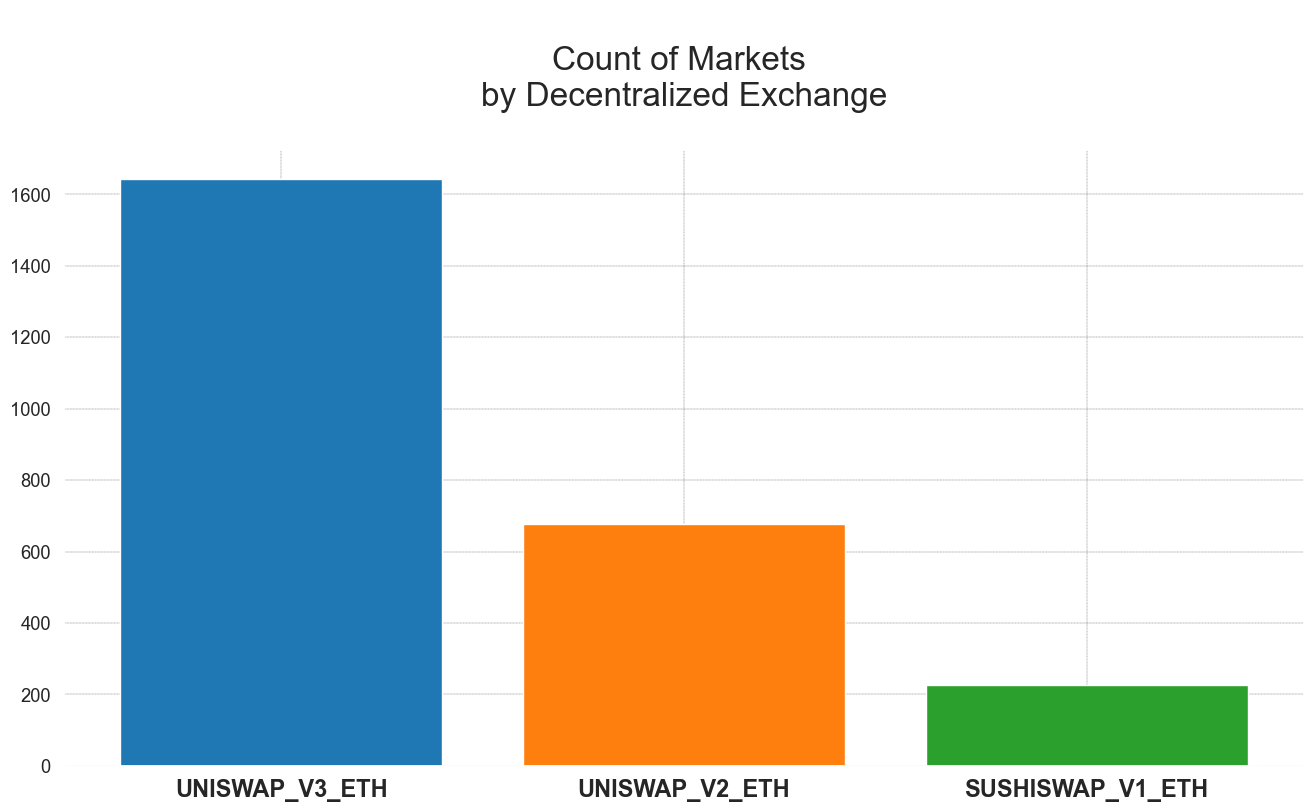

In [10]:
# Plot number of markets (pools) per DEX
ax1 = plt.subplot()
# mkt_counts['exchange'].plot(kind='bar', width=0.8, color=sns.color_palette('tab10'))
ax1.bar(x = mkt_counts['exchange'], height = mkt_counts['count'], color=sns.color_palette('tab10'))
plt.setp(ax1.get_xticklabels(), rotation=0)
ax1.set_facecolor("white")
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title('\nCount of Markets \nby Decentralized Exchange\n', fontdict={'fontsize': 24, 'font': 'arial'})
# for i, v in enumerate(mkt_counts['exchange']):
ax1.set_xticks(range(len(mkt_counts['exchange'])))
ax1.set_xticklabels([label.get_text().upper() for label in ax1.get_xticklabels()], rotation=0, ha='center', va='top', fontsize=17)
plt.xticks(fontweight='bold')
plt.show()

In [11]:
# Show fields
pd.DataFrame(exp_markets.loc[exp_markets['exchange'] == 'uniswap_v3_eth'].iloc[0]).dropna()

,0
market,uniswap_v3_eth-1-1inch-dai-spot
exchange,uniswap_v3_eth
base,1inch
quote,dai
pair,1inch-dai
type,spot
pool_config_id,1
contract_address,063332bbf9f8385e4106919b5c6ae2e6a4f72228
fee,0.01
price_includes_fee,False


### DEX markets include metadata for 3 different smart contracts:
- **contract_address:** The address of the liquidity pool contract. Each liquidity pool is a unique instance of a smart contract, deployed at a dedicated address. The pool contract holds both the base and the quote asset.
- **base_address:** The address of the ERC-20 token contract associated with the *base* asset.
- **quote_address:** The address of the ERC-20 token contract associated with the *quote* asset.

In [12]:
# DEX fields
exp_markets[['pool_config_id','contract_address','base_address','quote_address','fee']]

,pool_config_id,contract_address,base_address,quote_address,fee
0,1,063332bbf9f8385e4106919b5c6ae2e6a4f72228,111111111117dc0aa78b770fa6a738034120c302,6b175474e89094c44da98b954eedeac495271d0f,0.01
1,1,2ee7e6e459fffbbc655f09f2e1b3131abf98c397,111111111117dc0aa78b770fa6a738034120c302,a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.01
2,1,1d1284e43da1de5ee8dd6acbb03f3624cfbd872c,111111111117dc0aa78b770fa6a738034120c302,c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.01
3,1,f339217aa24e70eddf900f3b1a78eb9efcdea115,1a7e4e63778b4f12a199c062f3efdd288afcbce8,5f7827fdeb7c20b443265fc2f40845b715385ff2,0.01
4,1,735a26a57a0a0069dfabd41595a970faf5e1ee8b,1a7e4e63778b4f12a199c062f3efdd288afcbce8,a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.01
...,...,...,...,...,...
220,<NA>,f173a7a055340c91dbdf3083ce3babaa7535a03c,0bc529c00c6401aef6d220be8c6ea1667f6ad93e,6b3595068778dd592e39a122f4f5a5cf09c90fe2,0.3
221,<NA>,3a5747cf4e21861e2d0d3d51a0e8737ab4dfadc8,0bc529c00c6401aef6d220be8c6ea1667f6ad93e,a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.3
222,<NA>,f5fbc6ca5c677f1c977ed3a064b9dda14c5e241b,0bc529c00c6401aef6d220be8c6ea1667f6ad93e,dac17f958d2ee523a2206206994597c13d831ec7,0.3
223,<NA>,1d108372a83fbc3a0bfb7ca4d0e427449e7a5ca2,0bc529c00c6401aef6d220be8c6ea1667f6ad93e,2260fac5e5542a773aa44fbcfedf7c193bc2c599,0.3


Each liquidity pool is also associated with a corresponding fee percentage. With each trade, fees are distributed pro-rata to the pool's liquidity providers.

In [13]:
# Range of pool fees
pool_fees = pd.DataFrame(exp_markets.fee.unique().dropna())
pool_fees

,0
0,0.01
1,0.05
2,0.3
3,1.0


Due to the permissionless nature of provisioning a liquidity pool, users can easily add arbitrary ERC-20 tokens to the decentralized exchange. There are over 50,000 trading pairs available on Uniswap today. To prioritize only the most relevant and liquid markets, we cover the subset of markets where both tokens are part of Coin Metrics [reference rate coverage](https://docs.coinmetrics.io/asset-metrics/market/referenceratesusd).

In [14]:
# Assets covered
asset_coverage = np.unique(exp_markets[['base', 'quote']].values)
print(asset_coverage)
print('\nTotal number of assets: \033[1m' + str(len(asset_coverage)) + '\033[0m\n')

['1inch' 'aave' 'ageur_eth' 'alcx' 'alpha' 'alusd' 'ampl_eth' 'ant' 'ape'
 'api3' 'audio' 'ausd_eth' 'axs_1_eth' 'axs_2_eth' 'badger' 'bal'
 'band_eth' 'bat' 'bit' 'bnb_eth' 'bnt' 'boost_eth' 'btm_eth' 'busd'
 'cbat' 'cbeth' 'ccomp' 'cdai' 'cel' 'cennz' 'ceth' 'chz_eth' 'comp' 'cro'
 'crv' 'crvusd_eth' 'cuni' 'cusdc' 'cusdcv3' 'cusdt' 'cvc' 'cvx' 'cwbtc'
 'czrx' 'dai' 'dar' 'degen_eth' 'deusd_eth' 'dgx' 'dorkl_eth' 'dpi' 'drgn'
 'eeth_eth' 'elf' 'eng' 'enj' 'ens' 'esd' 'ethos' 'ethx_eth' 'eul'
 'eurc_eth' 'eurcv_eth' 'eure_eth' 'eurs_eth' 'eurt_eth' 'fdusd_eth'
 'fei_eth' 'flx' 'fox_eth' 'frax_eth' 'frxeth_eth' 'ftm_eth' 'ftt' 'fun'
 'fwb' 'fxc_eth' 'fxs' 'gala' 'gbpt_eth' 'gho_eth' 'glm' 'gno' 'grt'
 'gt_eth' 'gusd' 'gyen_eth' 'hbot' 'hbtc' 'hedg' 'hex_eth' 'hpos10i_eth'
 'hpos1m_eth' 'ht' 'husd' 'idrt_eth' 'imx' 'inst' 'kin1' 'knc' 'ldo'
 'lend' 'leo_eth' 'link' 'linq_eth' 'looks' 'loom' 'lpt' 'ltx_eth'
 'lusd_eth' 'mana' 'matic_eth' 'mco' 'meth_eth' 'mim_eth' 'mkr_2_eth'
 'mnt' 'mpl

The majority of DEX assets trade against **Wrapped Ether (WETH)**. Note that Ethereum's native asset ETH is not supported in Uniswap V2/V3, as the asset was created prior to the ERC-20 standard. From the Uniswap documentation:

> "Unlike Uniswap V1 pools, V2 pairs do not support ETH directly, so ETH⇄ERC-20 pairs must be emulated with WETH. The motivation behind this choice was to remove ETH-specific code in the core, resulting in a leaner codebase. End users can be kept fully ignorant of this implementation detail, however, by simply wrapping/unwrapping ETH in the periphery." <br/>
> [docs.uniswap.org](https://docs.uniswap.org/protocol/V2/concepts/protocol-overview/smart-contracts#weth)

In [15]:
# Enter an asset ticker to see available 'base' and 'quote' markets
asset = 'weth'

selected_markets = exp_markets.loc[(exp_markets['base']==asset) | (exp_markets['quote']==asset)]
print('\nTotal number of ' + '\033[1m' + asset + '\033[0m' + ' markets: \n\033[1m' 
      + str(len(selected_markets)) + '\n')


Total number of weth markets: 
847



### Using the min_time parameter, we can filter for the newest DEX liquidity pool deployed in our coverage

In [16]:
defi_market_catalogs = pd.concat([client.catalog_market_trades_v2(
    market_type = 'spot',
    page_size = 10000,
    exchange = "uniswap_v3_eth",
).to_dataframe(), client.catalog_market_trades_v2(
    market_type = 'spot',
    page_size = 10000,
    exchange = "uniswap_v2_eth",
).to_dataframe(), client.catalog_market_trades_v2(
    market_type = 'spot',
    page_size = 10000,
    exchange = "sushiswap_v1_eth",
).to_dataframe()]).sort_values('min_time').reset_index()

In [17]:
print (defi_market_catalogs)

      index                                      market  \
0       560               uniswap_v2_eth-usdc-weth-spot   
1       154                uniswap_v2_eth-dai-weth-spot   
2       152                uniswap_v2_eth-dai-usdc-spot   
3       387                uniswap_v2_eth-ren-usdc-spot   
4        85               uniswap_v2_eth-cdai-weth-spot   
...     ...                                         ...   
2012    207         uniswap_v3_eth-2-paxg-usdt_eth-spot   
2013    208       uniswap_v3_eth-2-paxg-xaut_2_eth-spot   
2014    302  uniswap_v3_eth-2-weeth_eth-pufeth_eth-spot   
2015     24    uniswap_v3_eth-1-deusd_eth-usdt_eth-spot   
2016    656   uniswap_v3_eth-3-usdt_eth-crvusd_eth-spot   

                      min_time                  max_time  
0    2020-05-05 21:09:32+00:00 2024-10-10 15:38:59+00:00  
1    2020-05-14 00:01:38+00:00 2024-10-10 15:32:11+00:00  
2    2020-05-15 02:18:16+00:00 2024-10-10 15:37:11+00:00  
3    2020-05-17 21:32:57+00:00 2024-09-03 22:31:59+00:0

In [18]:
# Check for the newest market
newest = defi_market_catalogs.loc[defi_market_catalogs['min_time'].idxmax()].dropna()
pd.DataFrame(newest)

,2016
index,656
market,uniswap_v3_eth-3-usdt_eth-crvusd_eth-spot
min_time,2024-09-28 07:12:59+00:00
max_time,2024-10-10 10:46:47+00:00


# DEX Swaps Data

Swaps data is served through our existing */timeseries/market-trades* endpoint because swaps are conceptually identical to a trade. Users can see all the standard trade fields for a swap such as **time, price, and volume** but can also see defi-specific fields such as the **block height, block hash, transaction id, addresses involved** in the swap, and more.

In [19]:
defi_market = 'uniswap_v3_eth-2-weth-usdt_eth-spot'

start = datetime(year=2024, month=9, day=28)
end = datetime(year=2024, month=10, day=3)

# start = "2024-09-28" datetime.now() - timedelta(days=3)
# end = "2024-10-03" datetime.now() - timedelta(hours=1)

In [20]:
defi_trades = client.get_market_trades(
    markets=defi_market,
    start_time=start,
    end_time=end,
    page_size=10000
).to_dataframe()

In [21]:
defi_trades['amount'] = defi_trades['amount'].astype(float)
defi_trades.head()

,market,time,coin_metrics_id,amount,price,database_time,side,block_hash,block_height,txid,initiator,sender,beneficiary
0,uniswap_v3_eth-2-weth-usdt_eth-spot,2024-09-28 00:02:35+00:00,04V16QH5M1MJID0J6I0JG58KJ8SG2L9IKSDLNRB045SQ1Q...,0.018185,2695.753372,2024-09-28 00:02:45.846142+00:00,buy,25b06d39341334813815149a39015532a71b5bed602179...,20845418,e59452b3bb96e0d32fae12ccdf016de46088677c651cd9...,9ac1914af5f020d6f8b6afee976a110c3d5cc3a3,def1c0ded9bec7f1a1670819833240f027b25eff,def1c0ded9bec7f1a1670819833240f027b25eff
1,uniswap_v3_eth-2-weth-usdt_eth-spot,2024-09-28 00:03:11+00:00,04V16RF4EB2JLNA71I9J63JD317T9BC445H12O9LRS9LET...,6.575382,2696.471168,2024-09-28 00:03:20.086567+00:00,buy,e472c53add470c93330e6d184fd4ad842162116135df13...,20845421,5772a8d90add0e04f712e52990617f99106ba2812841b8...,93793bd1f3e35a0efd098c30e486a860a0ef7551,68d3a973e7272eb388022a5c6518d9b2a2e66fbf,68d3a973e7272eb388022a5c6518d9b2a2e66fbf
2,uniswap_v3_eth-2-weth-usdt_eth-spot,2024-09-28 00:03:35+00:00,04V16RPCTT37H4S2NMDMJ6NNIFB0QKAMVCSI8EOQKN63FQ...,0.741120,2697.268428,2024-09-28 00:03:55.614677+00:00,buy,2cef46789382bd9b699af793d60d5156fb39243b1aa5cc...,20845423,4f4aeefc3bcfafcd7fb89b0f34ecc4c32406900ae11c76...,2520d3ba7d01638ca671731a1f52fe806b478106,1111111254eeb25477b68fb85ed929f73a960582,1111111254eeb25477b68fb85ed929f73a960582
3,uniswap_v3_eth-2-weth-usdt_eth-spot,2024-09-28 00:04:23+00:00,04V16SOS64RJPU3O4IOE16ORLUUS8JN3AJGLA0Q7F5MC1C...,5.014417,2697.937585,2024-09-28 00:04:30.669374+00:00,buy,1c31373cf87824b0e09b1bafbdc44ee354e1550347796c...,20845427,64b03668dea2194daf3e56ad8f452e9b01bcb612ac1ea2...,d1fa51f2db23a9fa9d7bb8437b89fb2e70c60cb7,d4bc53434c5e12cb41381a556c3c47e1a86e80e3,d4bc53434c5e12cb41381a556c3c47e1a86e80e3
4,uniswap_v3_eth-2-weth-usdt_eth-spot,2024-09-28 00:04:35+00:00,04V16T2UFV6GNIHS4IDG0KD5EHCJ4HSIFEO05TI9SHFUHG...,0.031732,2698.519611,2024-09-28 00:04:50.184814+00:00,sell,5e7fcd0bca3c249b0051a574593247927bb002f649e45f...,20845428,9aa35835ffdcdfc7309bfb9db69ac2ae4d35395c7fe398...,24bfe8a4902645f3d54ad95377a4befd9aecb250,7ba00d171698d2589917e30314d852eb16d7c7e6,7ba00d171698d2589917e30314d852eb16d7c7e6


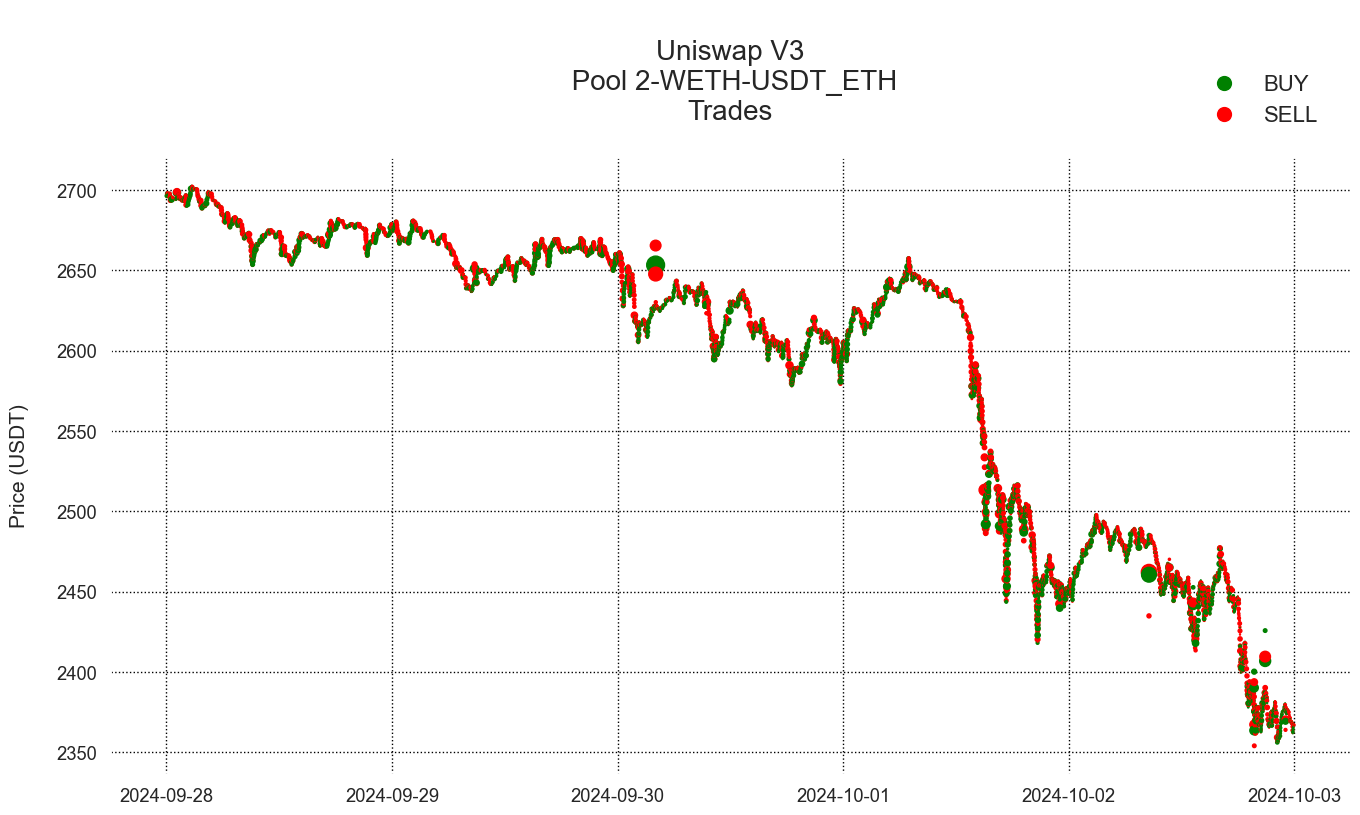

In [22]:
color_map = {'buy': 'green', 'sell': 'red'}
defi_price = plt.scatter(x=defi_trades['time'], y=defi_trades['price'], s=defi_trades['amount'], c=defi_trades['side'].map(color_map))

plt.xlabel("", fontsize=15)
plt.ylabel("Price (USDT)\n", font='arial',fontsize=15)

market_string = defi_market.split("uniswap_v3_eth-", 1)[-1].split("-spot")[0].upper()
plt.title('\nUniswap V3\n Pool ' + market_string + '\nTrades\n', font='arial', size=20)

legend_labels = ['BUY', 'SELL']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['buy'], markersize=12),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['sell'], markersize=12)]
legend = plt.legend(legend_handles, legend_labels, loc='lower right', fontsize=16, framealpha=0, bbox_to_anchor=(0.99, 1.02))

plt.gca().set_facecolor('white')
plt.grid(color='black', linestyle='dotted')
plt.show()

In [23]:
pd.DataFrame(defi_trades.iloc[0])

,0
market,uniswap_v3_eth-2-weth-usdt_eth-spot
time,2024-09-28 00:02:35+00:00
coin_metrics_id,04V16QH5M1MJID0J6I0JG58KJ8SG2L9IKSDLNRB045SQ1Q...
amount,0.018185
price,2695.753372
database_time,2024-09-28 00:02:45.846142+00:00
side,buy
block_hash,25b06d39341334813815149a39015532a71b5bed602179...
block_height,20845418
txid,e59452b3bb96e0d32fae12ccdf016de46088677c651cd9...


### Unlike centralized exchanges, where there is an unknown buyer and a seller, each swap is associated with 3 different Ethereum addresses:
- **Initiator** is the ethereum address which submitted the transaction as a result of which the swap/liquidity action occurred
- **Sender** is the ethereum address that invoked the uniswap pool smart contract's function for swapping or adding/removing liquidity
- **Beneficiary** is the ethereum address that got credited with the output tokens (in case of a swap or liquidity removal) or with liquidity (in case of liquidity addition)


In [24]:
print('\nTotal number of ' + '\033[1m' + defi_market + '\033[0m' + ' trades (' + str(start.date()) + ' to ' + str(end.date()) + '): \n\033[1m' 
      + str(len(defi_trades)) + '\033[0m\n')

print('\nTotal number of ' + '\033[1m' + defi_market + '\033[0m' + ' buys (' + str(start.date()) + ' to ' + str(end.date())+ '): \n\033[1m' 
      + str(len(defi_trades.loc[(defi_trades['side']=='buy')])) + '\033[0m\n')

print('\nTotal number of ' + '\033[1m' + defi_market + '\033[0m' + ' unique buyers (' + str(start.date()) + ' to ' + str(end.date()) + '): \n\033[1m' 
      + str(len((defi_trades.loc[(defi_trades['side']=='buy')]).beneficiary.unique())) + '\n')


Total number of uniswap_v3_eth-2-weth-usdt_eth-spot trades (2024-09-28 to 2024-10-03): 
9357


Total number of uniswap_v3_eth-2-weth-usdt_eth-spot buys (2024-09-28 to 2024-10-03): 
4737


Total number of uniswap_v3_eth-2-weth-usdt_eth-spot unique buyers (2024-09-28 to 2024-10-03): 
431



In [25]:
defi_buyers = pd.DataFrame(defi_trades)
defi_buyers['time'] = pd.to_datetime(defi_buyers['time'])
defi_buyers.set_index('time', inplace=True)

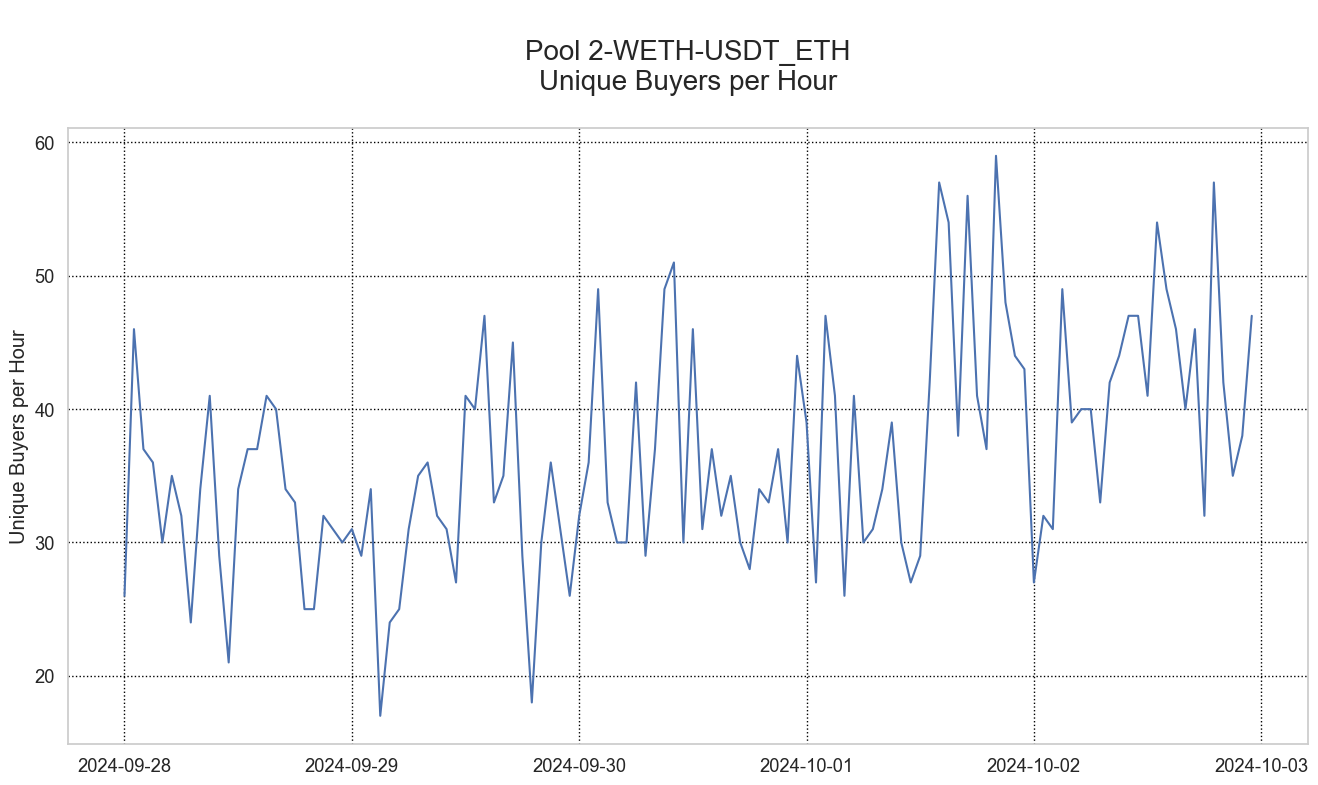

In [26]:
hourly_unique_buyers = defi_buyers['beneficiary'].resample('h').nunique()
sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.lineplot(data=hourly_unique_buyers, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Unique Buyers per Hour')
ax.set_title('\nPool ' + str(market_string) + '\nUnique Buyers per Hour\n', font='arial', size=20)
plt.grid(color='black', linestyle='dotted')
plt.show()

In [27]:
# Unique buyer addresses
((defi_trades.loc[(defi_trades['side']=='buy')]).beneficiary.unique())

<StringArray>
['def1c0ded9bec7f1a1670819833240f027b25eff',
 '68d3a973e7272eb388022a5c6518d9b2a2e66fbf',
 '1111111254eeb25477b68fb85ed929f73a960582',
 'd4bc53434c5e12cb41381a556c3c47e1a86e80e3',
 '3c2a37b1131da9941a577e7155ee393a5a6d7667',
 '22f9dcf4647084d6c31b2765f6910cd85c178c18',
 'a69babef1ca67a37ffaf7a485dfff3382056e78c',
 'e592427a0aece92de3edee1f18e0157c05861564',
 '298d5d792531a48934960fda716897c9024e7972',
 '9008d19f58aabd9ed0d60971565aa8510560ab41',
 ...
 'bbd9784d40141186aa4832caf1d9511a18ee87cb',
 '6ec94c2a29caf3fed73177267fdc11a4c77ec4ee',
 '5d811a9d059ddab0c18b385ad3b752f734f011cb',
 '9b909d64866c677903af0481b0ec9b472078db34',
 'e97c0000b4d4139de6a50000bf00005c3f000a1c',
 'b7426bfd2abf64428fa82a71b0d44b056ffcc286',
 'f2b6525a3d7f28113cc57cb9b73dde9230073059',
 '5278dd4ab7aa1c1f06bcd84b92ce59879cbf8936',
 'c715a91f98a3370c8806b54c1a4738d85753848b',
 'd0f292fa6fe694892bcf52b55ca0f3e277be17c0']
Length: 431, dtype: string

In [28]:
# Calculate approximate USD volume (NOTE: quote asset must be a stablecoin)
defi_trades['DEX Volume (USD)'] = (defi_trades['amount'])*(defi_trades['price'])

# Use only the amount field if base asset is a stablecoin
#defi_trades['DeFi Volume (USD)'] = (defi_trades['amount'])

In [29]:
# Largest trade
largest = defi_trades.loc[defi_trades['amount'].idxmax()]
trade_size_usd = '${:,.2f}'.format(largest['DEX Volume (USD)'])
pd.DataFrame(largest)

,3286
market,uniswap_v3_eth-2-weth-usdt_eth-spot
time,2024-09-30 04:03:11+00:00
coin_metrics_id,04V5058KK3J2F7I55REEGSBAFL5O0IV9FT32T8C1IN1GLP...
amount,164.559018
price,2653.367269
database_time,2024-09-30 04:03:18.549204+00:00
side,buy
block_hash,14a0e6279e452edce8716a7d4b804be97f462ea18195c3...
block_height,20860949
txid,2cfde2f16b538097ee51df1f60a87bd0c34a5c517fd87a...


In [30]:
print('\nLARGEST TRADE: \n\n' + trade_size_usd + ' by address 0x' + largest['beneficiary'] + '\n')


LARGEST TRADE: 

$436,635.51 by address 0xe37e799d5077682fa0a244d46e5649f71457bd09



In [31]:
# ATLAS links for blockchain metadata
md('<br>**ATLAS** by Coin Metrics <br> **Blockchain Search Engine** <br><br>**BUYER ADDRESS:** https://atlas.coinmetrics.io/address-details?asset=weth&address=' + str(largest['beneficiary']) + '<br><br>**TRANSACTION INFO:** https://atlas.coinmetrics.io/transaction-details?asset=weth&tx_hash=' + str(largest['txid']) + '<br><br>**BlOCK INFO:** https://atlas.coinmetrics.io/block-details?asset=weth&block_hash=' + str(largest['block_hash']) + '<br><br>For more info on **ATLAS** visit: https://coinmetrics.io/atlas/')

<br>**ATLAS** by Coin Metrics <br> **Blockchain Search Engine** <br><br>**BUYER ADDRESS:** https://atlas.coinmetrics.io/address-details?asset=weth&address=e37e799d5077682fa0a244d46e5649f71457bd09<br><br>**TRANSACTION INFO:** https://atlas.coinmetrics.io/transaction-details?asset=weth&tx_hash=2cfde2f16b538097ee51df1f60a87bd0c34a5c517fd87ab7235721e29f516b6a<br><br>**BlOCK INFO:** https://atlas.coinmetrics.io/block-details?asset=weth&block_hash=14a0e6279e452edce8716a7d4b804be97f462ea18195c30ae608b564a4e3c0f1<br><br>For more info on **ATLAS** visit: https://coinmetrics.io/atlas/

In [32]:
defi_trades['Datetime'] = pd.to_datetime(defi_trades['time']).dt.floor('h')
defi_vol = defi_trades.groupby('Datetime')['DEX Volume (USD)'].sum()

In [33]:
pd.DataFrame(defi_vol)

,DEX Volume (USD)
Datetime,
2024-09-28 00:00:00+00:00,233622.387479
2024-09-28 01:00:00+00:00,395123.849
2024-09-28 02:00:00+00:00,369315.276682
2024-09-28 03:00:00+00:00,302164.77343
2024-09-28 04:00:00+00:00,297449.152711
...,...
2024-10-02 19:00:00+00:00,1680875.333594
2024-10-02 20:00:00+00:00,1116915.909455
2024-10-02 21:00:00+00:00,388575.141488


### Retrieving volume for a centralized exchange via the market-candles endpoint

In [34]:
cex_market = 'coinbase-eth-usd-spot'

In [35]:
# Fetch the market candles and rename the column
cex_vol = client.get_market_candles(
    markets=cex_market,
    frequency='1h',
    start_time=start,
    end_time=end - timedelta(hours=1)
).to_dataframe()

# Rename the volume column
cex_vol = cex_vol.rename(columns={"candle_usd_volume": "CEX Volume (USD)"})

# Directly convert 'time' to datetime format with an explicit format
cex_vol['Datetime'] = pd.to_datetime(cex_vol['time'], format='%Y-%m-%dT%H:%M:%S')  # Specify the correct format based on your 'time' data

# Group by 'Datetime' and sum 'CEX Volume (USD)'
cex_vol = cex_vol.groupby('Datetime')['CEX Volume (USD)'].sum()

In [36]:
vol_comp = pd.merge(defi_vol, cex_vol,on="Datetime", how="left").dropna()
vol_comp["DEX Volume (USD)"] = vol_comp['DEX Volume (USD)'].astype(int)
vol_comp["CEX Volume (USD)"] = vol_comp['CEX Volume (USD)'].astype(int)

In [37]:
vol_comp

,DEX Volume (USD),CEX Volume (USD)
Datetime,,
2024-09-28 00:00:00+00:00,233622,4138900
2024-09-28 01:00:00+00:00,395123,1936527
2024-09-28 02:00:00+00:00,369315,4740780
2024-09-28 03:00:00+00:00,302164,3683987
2024-09-28 04:00:00+00:00,297449,3112657
...,...,...
2024-10-02 19:00:00+00:00,1680875,26102767
2024-10-02 20:00:00+00:00,1116915,16183193
2024-10-02 21:00:00+00:00,388575,5268967


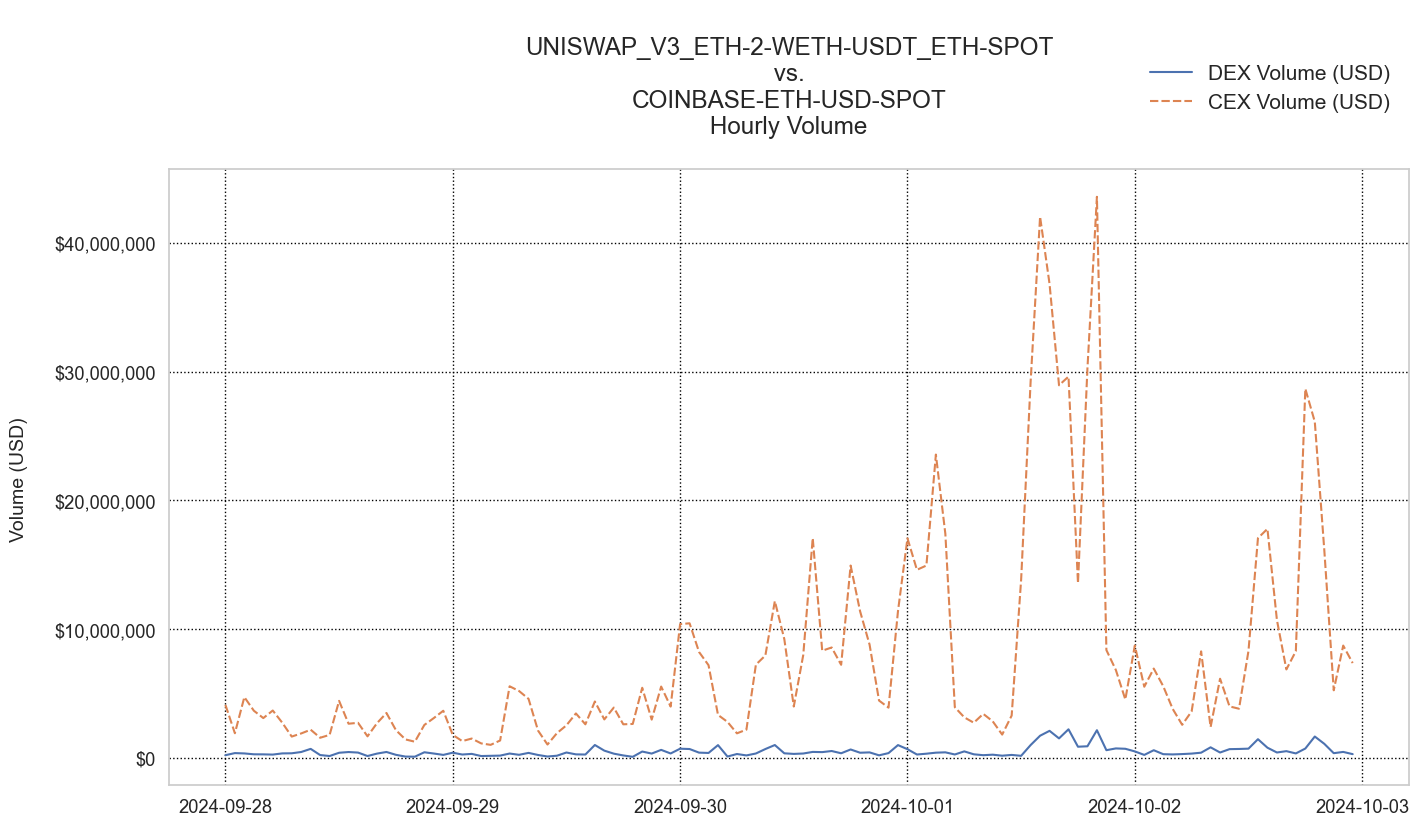

In [38]:
sns.set_style('whitegrid')
vc = sns.lineplot(data=vol_comp)
vc.yaxis.set_major_formatter('${x:,.0f}')
vc.set_title(str('\n' + defi_market.upper() + '\n vs. \n' + cex_market.upper() + '\n Hourly Volume \n'),font='arial',fontsize=17.5)
vc.set_ylabel("Volume (USD) \n", font='arial',fontsize = 14)
plt.grid(color='black', linestyle='dotted')
legend = vc.legend(fontsize=15, framealpha=0, bbox_to_anchor=(1.0, 1.2))
vc.set_xlabel("");